## Normalization

Normalization is a technique often applied as part of data preparation for machine learning . The goal of normalization is to change the values of numeric columns in the dataset to use of common scale , without distorting difference in the range of values or losing information .

## Techniques of normalization : 
1. MinMax Scaleing 
2. Mean normalization 
3. Max Absolute
4. Robust Scaleing 


### MinMax Scaling 



The Min-Max scaling (normalization) formula is:

$$
X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

Where:
- \( X \) = original value
- \( X_{min} \) = minimum value of the feature
- \( X_{max} \) = maximum value of the feature

This will scale all values to a range of [0, 1].

**To scale to a custom range \([a, b]\):**
$$
X_{scaled} = a + \frac{(X - X_{min}) \times (b - a)}{X_{max} - X_{min}}
$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Wine.csv")

In [5]:
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
data = df.iloc[:, 0:3]

In [13]:
data.head()

,class,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

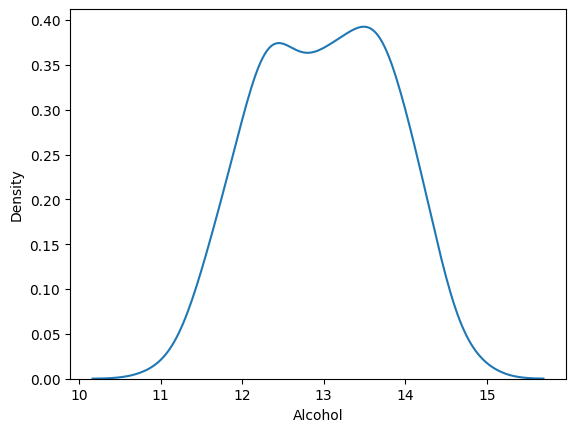

In [14]:
sns.kdeplot(data["Alcohol"])

<Axes: xlabel='Malic acid', ylabel='Density'>

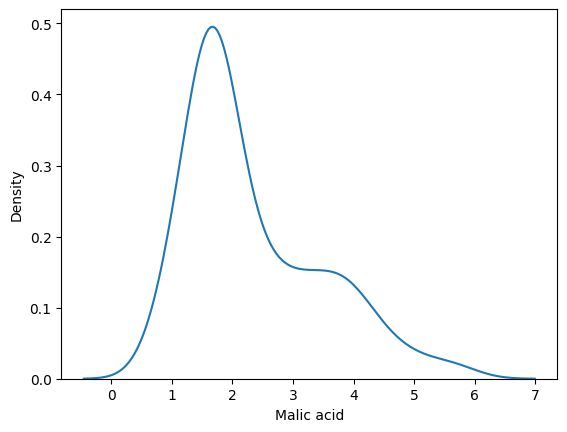

In [15]:
sns.kdeplot(data["Malic acid"])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

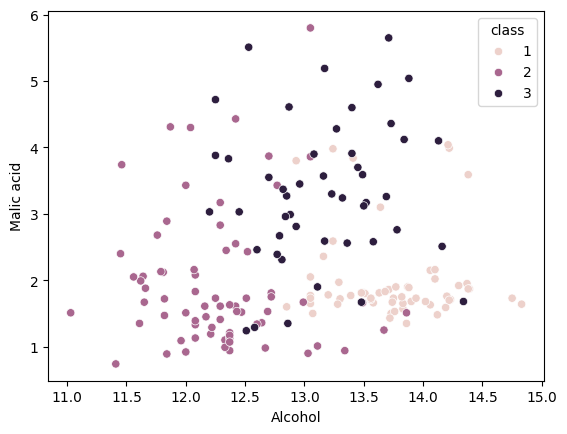

In [18]:
sns.scatterplot(x="Alcohol", y="Malic acid", hue="class", data=data)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(data.drop('class' , axis = 1) , 
df['class'] , 
test_size = 0.3 , 
random_state = 0)

In [20]:
x_train.shape , x_test.shape

((124, 2), (54, 2))

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# We always have to  remember that we have to fit only train model but we have to transform both test and train model .
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [23]:
x_train_scaled = pd.DataFrame(x_train_scaled , columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled , columns = x_test.columns)

In [24]:
np.round(x_train.describe() , 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [25]:
np.round(x_train_scaled.describe() , 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


Text(0.5, 1.0, 'after Scaling')

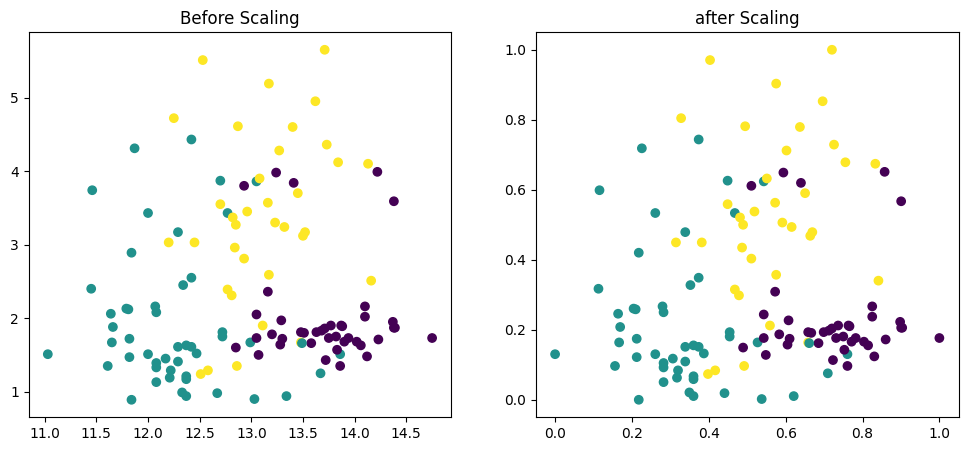

In [27]:
fig , (ax1 , ax2) = plt.subplots(ncols = 2 , figsize = (12 , 5))

ax1.scatter(x_train['Alcohol'] , x_train['Malic acid'] , c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Alcohol'] , x_train_scaled['Malic acid'] , c=y_train)
ax2.set_title("after Scaling")

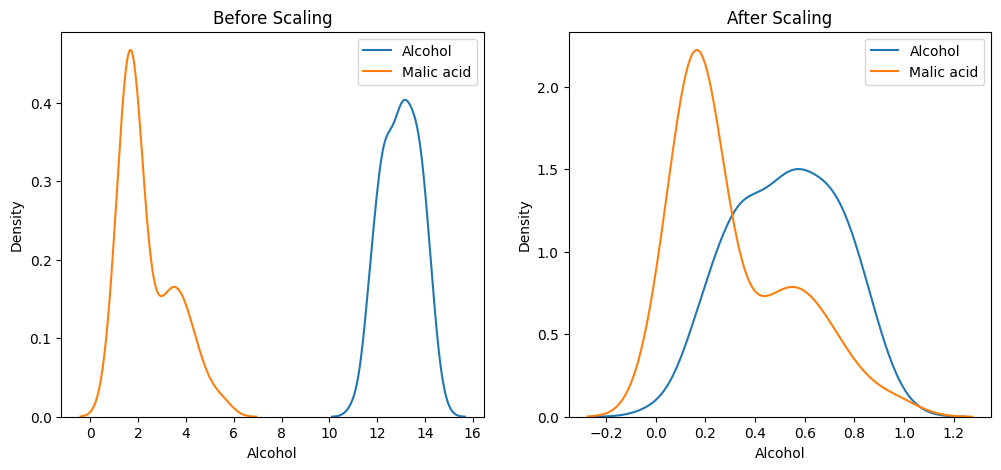

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

sns.kdeplot(x_train['Alcohol'], label='Alcohol', ax=ax1)
sns.kdeplot(x_train['Malic acid'], label='Malic acid',  ax=ax1)
ax1.set_title("Before Scaling")
ax1.legend()

sns.kdeplot(x_train_scaled['Alcohol'], label='Alcohol', ax=ax2)
sns.kdeplot(x_train_scaled['Malic acid'],
            label='Malic acid',  ax=ax2)
ax2.set_title('After Scaling')
ax2.legend()

plt.show()

### Mean Normalization



Mean normalization transforms a feature so that its mean becomes zero. The formula is:

$$
X_{\text{normalized}} = \frac{X - \text{mean}(X)}{X_{\text{max}} - X_{\text{min}}}
$$

Where:
- \( X \) = original value
- \( \text{mean}(X) \) = mean of the feature
- \( X_{\text{max}} \) = maximum value of the feature
- \( X_{\text{min}} \) = minimum value of the feature

### MaxAbsScaling


**MaxAbs Scaling** scales each feature by its maximum absolute value so that the values are in the range [-1, 1].  
This method is useful for data that is already centered at zero or contains both positive and negative values.

**Formula:**

$$
X_{\text{scaled}} = \frac{X}{|X_{\text{max}}|}
$$

Where:
- $X$: original value
- $|X_{\text{max}}|$: maximum absolute value in the feature (the largest value by magnitude, ignoring sign)

### Robust Scaling



Robust Scaling uses statistics that are robust to outliers (the median and the interquartile range) to scale features.  
This makes it effective for data with outliers, as it reduces their influence.

**Formula:**

$$
X_{\text{scaled}} = \frac{X - \text{median}(X)}{\text{IQR}}
$$

Where:
- $X$: original value
- $\text{median}(X)$: median of the feature
- $\text{IQR}$: interquartile range ($Q_3 - Q_1$), where $Q_1$ is the 25th percentile and $Q_3$ is the 75th percentile

**Description:**  
Robust scaling centers the data using the median and scales it according to the interquartile range, making it less sensitive to outliers compared to MinMax or Standard scaling.